## Advanced Machine Learning
#### Lab # 9
Amir Ali

### Task

1. Select any dataset corresponding to binary classification problem wih quantitative variables. 
2. Compare the accuracy of Naive Bayes method
    * with kernel density estimator
    * with Gaussian approximation
    * discretization of quantitative features
    * and LDA.

In [112]:
# import libraries
import bisect
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

###  Binary Classification Data wih Quantitative Variables.

In [113]:
# load the data
from sklearn.datasets import load_breast_cancer
data = load_breast_cancer()

In [114]:
# define predictor and target attribute
X = data.data
Y = data.target

In [115]:
# split the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 42)

In [116]:
# Shape of train and test data
print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

(455, 30) (114, 30)
(455,) (114,)


### 1. Naive Bayes with Gaussian

In [117]:
from sklearn.naive_bayes import GaussianNB

In [118]:
gnb = GaussianNB()

In [119]:
gnb.fit(X_train, y_train)

GaussianNB()

In [120]:
gnb_pred = gnb.predict(X_test)

In [145]:
gnb_acc = accuracy_score(y_test, gnb_pred)
gnb_acc

0.9736842105263158

### 2. Naive Bayes with KDE [1]

In [156]:
import NB_KDE    # reference

In [157]:
knb = NB_KDE.Naive_Bayes_Kernel_Density_Estimation(bandwidth=1,kernel='radial')

In [158]:
knb.fit(X_train, y_train)

In [159]:
knb_pred = knb.predict(X_test)

In [160]:
knb_acc = accuracy_score(y_test, knb_pred)
knb_acc

0.9298245614035088

### 3. Naive Bayes with discretization of quantitative features

In [151]:
import NB_Discretization

In [152]:
dnb = NB_Discretization.Naive_Bayes_discretization()

In [153]:
dnb.fit(y_train, X_train)

In [154]:
dnb_pred = dnb.predict(X_test)

In [161]:
dnb_acc = accuracy_score(y_test, dnb_pred)
dnb_acc

0.9385964912280702

### 4. Linear Discriminant Analysis

In [162]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [163]:
lda = LinearDiscriminantAnalysis()

In [164]:
lda.fit(X_train, y_train)

LinearDiscriminantAnalysis()

In [165]:
lda_predict = lda.predict(X_test)

In [166]:
lda_acc = accuracy_score(y_test, lda_predict)
lda_acc

0.956140350877193

### 5. Comparison 

[0.9736842105263158, 0.9298245614035088, 0.9385964912280702, 0.956140350877193]


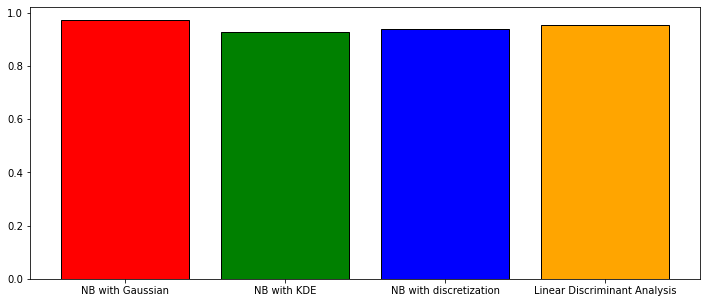

In [168]:
plt.figure(figsize = (12, 5))

result = [gnb_acc, knb_acc, dnb_acc, lda_acc]
label = ["NB with Gaussian", "NB with KDE", "NB with discretization", "Linear Discriminant Analysis"]
colors=[ 'red', 'green', 'blue', 'orange']

plt.bar(label, result, color = colors, edgecolor='black')
print(result)

#### reference

[1] https://github.com/sampath9dasari/NaiveBayesClassifier-KDE/tree/master/lib